# Assignment 4

Dataset - https://github.com/selva86/datasets/blob/master/BostonHousing.csv

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [2]:
data = pd.read_csv("./Datasets/boston-housing-data.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Plotting Barplot

<AxesSubplot:ylabel='medv'>

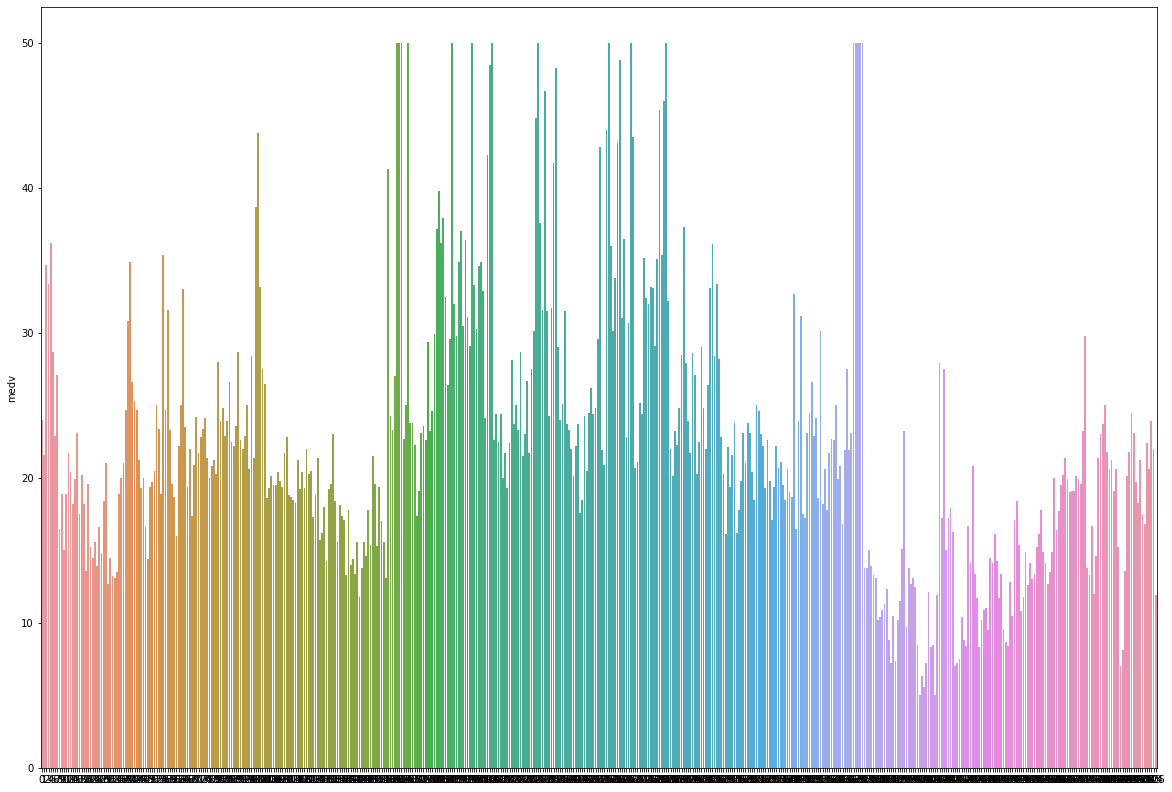

In [6]:
plt.figure(figsize=(20, 14))
sns.barplot(x = data.index, y = data['medv'])

## Plotting Distplot

c:\Users\Shrirang\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

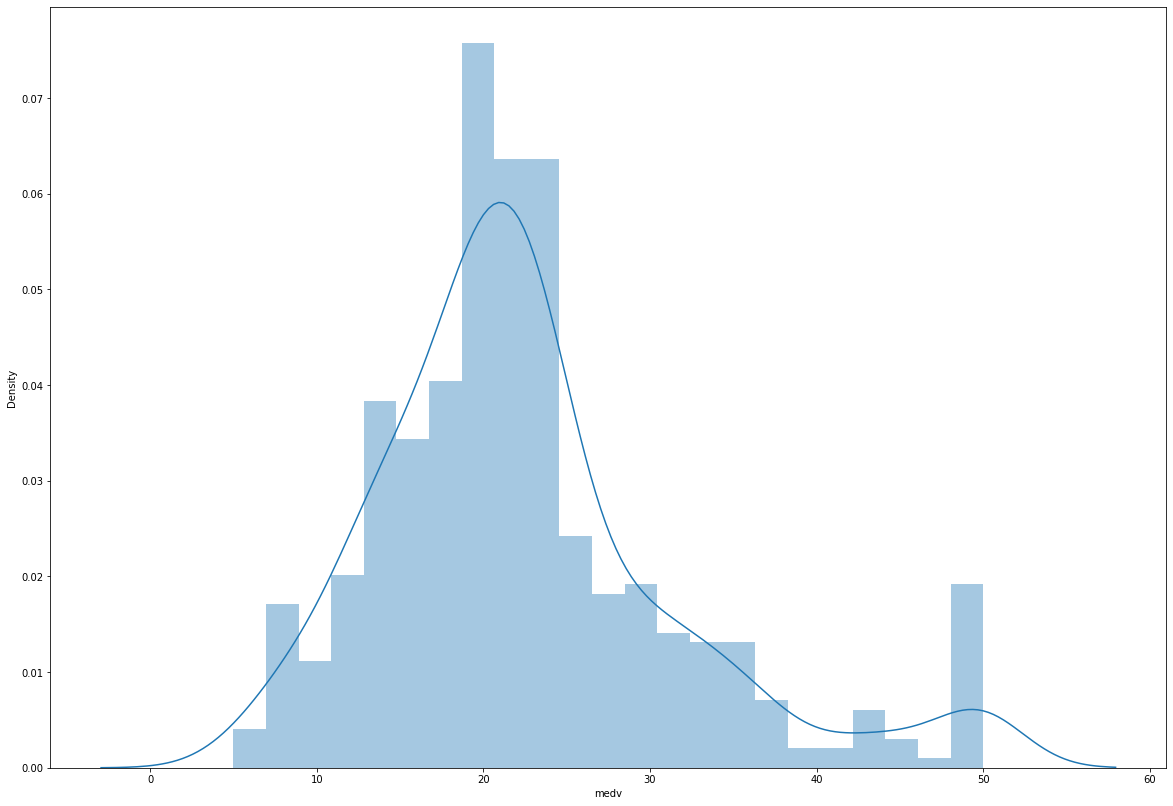

In [7]:
plt.figure(figsize=(20, 14))
sns.distplot(data['medv'])

## Plotting Heatmap

<AxesSubplot:>

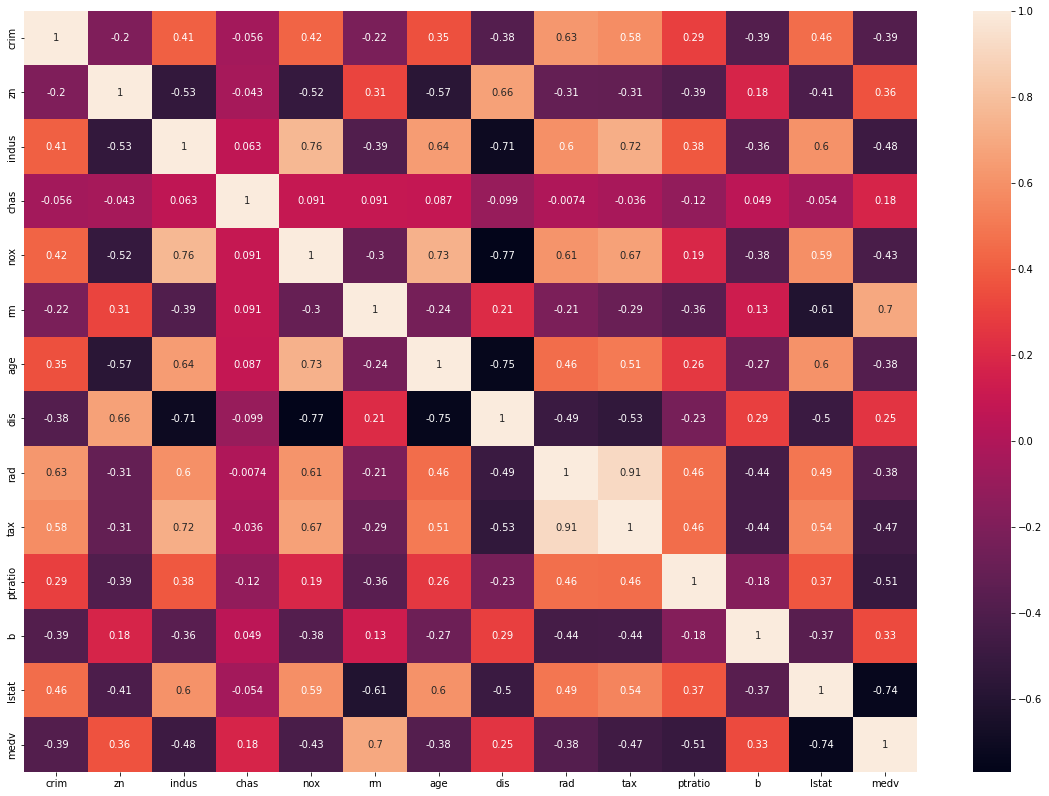

In [8]:
plt.figure(figsize=(20, 14))
sns.heatmap(data.corr(), annot=True)

## Plotting medv against lstat

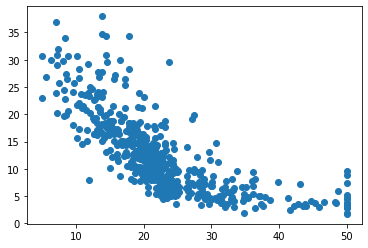

In [9]:
plt.scatter(data['medv'], data['lstat'])

## Plotting medv against rm

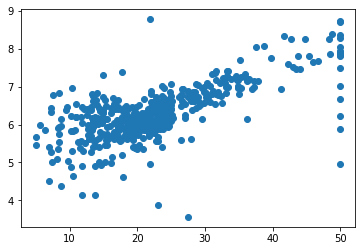

In [10]:
plt.scatter(data['medv'], data['rm'])

<Figure size 1440x1008 with 0 Axes>

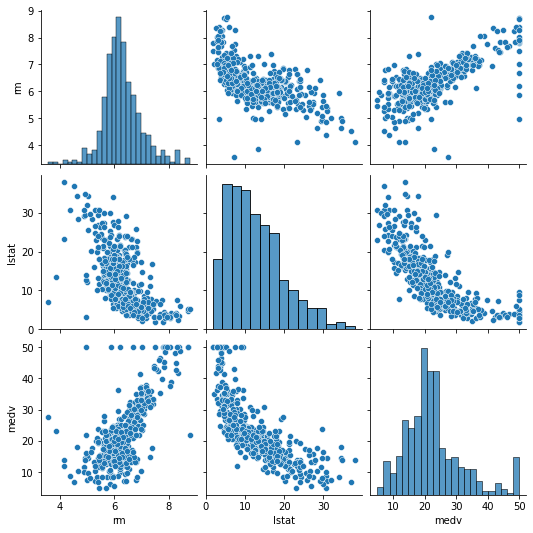

In [15]:
plt.figure(figsize=(20, 14))
sns.pairplot(data[['rm', 'lstat', 'medv']])

In [16]:
X = data[['rm', 'lstat']]
y = data['medv']

X.shape, y.shape

((506, 2), (506,))

## Splitting training and testing datasets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 2), (102, 2), (404,), (102,))

In [18]:
model = LinearRegression(n_jobs=-1)

## Training the model

In [19]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [20]:
y_pred = model.predict(X_train)

### Calculating RMSE

In [21]:
mse = mean_squared_error(y_train, y_pred)
math.sqrt(mse)

5.7081656361616355

In [22]:
prediction = model.predict(X_test)

## Mean Absolute Error

In [31]:
mean_absolute_error(y_test, prediction)

3.4899701116925725

## Mean Squared Error and Root Mean Squared Error.

In [24]:
mse = mean_squared_error(y_test, prediction)
math.sqrt(mse)

4.750934616375961

## R2 Score

In [25]:
r2_score(y_test, prediction)

0.6504699912045554

## Plotting regression line

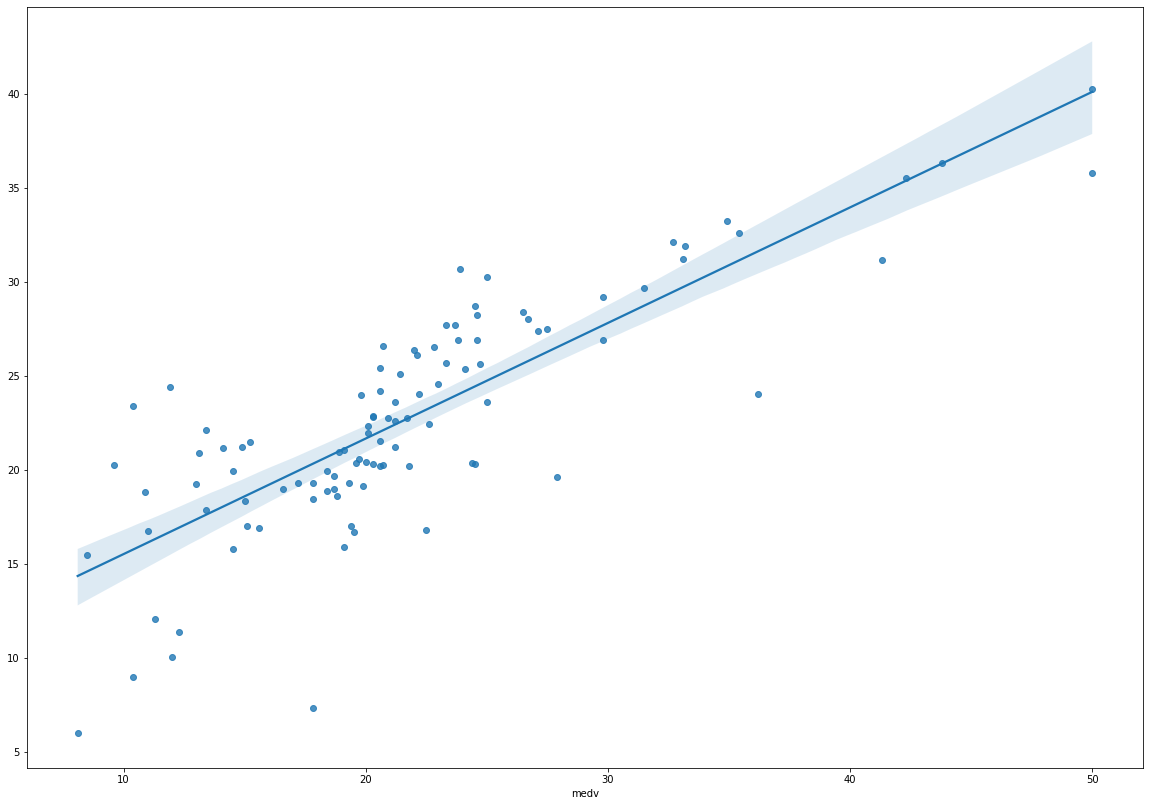

In [28]:
plt.figure(figsize=(20, 14))
sns.regplot(y_test, prediction)
plt.show()